In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [21]:
# Load the dataset
file_path = 'dataset/09_05_4_1_AgricultureOutliers_HardVotingBased_IDO.csv'
data= pd.read_csv(file_path)



In [22]:
# Preprocess the data
features = data.drop(columns=['N2O'])  # Assuming 'N2O' is the target column
target = data['N2O']

# Encode categorical variables if any
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Define X and y
X = scaled_features
y = target

In [30]:
test_sizes = [0.2,0.25, 0.3, 0.35]
results = {}
# Initialize an empty list to store results
evaluation = []


In [39]:
def train_and_evaluate(test_size):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test Size: {test_size}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")

    # Create plots in a single row with three columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot the actual vs predicted values
    sns.scatterplot(x=y_test, y=y_pred, ax=axes[0])
    axes[0].set_xlabel('Actual N2O')
    axes[0].set_ylabel('Predicted N2O')
    axes[0].set_title(f'Actual vs Predicted N2O (Test Size: {test_size})')

    # Plot residuals
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, ax=axes[1])
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f'Residuals Distribution (Test Size: {test_size})')

    # Plot feature importance
    xgb.plot_importance(model, ax=axes[2], max_num_features=10)
    axes[2].set_title('Feature Importance')

    plt.tight_layout()
    plt.savefig(f'visual/0906_combined_test_{int(test_size*100)}_NoOutlier_IDO.png')
    
    plt.show()

    return model, mse, rmse, mae, r2


In [34]:
# def train_and_evaluate(test_size):
#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

#     # Initialize the XGBoost model
#     model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

#     # Train the model
#     model.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = model.predict(X_test)

#     # Evaluate the model's performance
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f"Test Size: {test_size}")
#     print(f"Mean Squared Error: {mse}")
#     print(f"Root Mean Squared Error: {rmse}")
#     print(f"Mean Absolute Error: {mae}")
#     print(f"R-squared: {r2}")

#     # Plot the actual vs predicted values
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x=y_test, y=y_pred)
#     plt.xlabel('Actual N2O')
#     plt.ylabel('Predicted N2O')
#     plt.title(f'Actual vs Predicted N2O (Test Size: {test_size})')
#     # plt.savefig('01.Dataset-Rofiqul/Visual/AfterRemoveOutliers/002_1_ActualVsPredictedN2O_test_'+(str(int(test_size*100)))+'_NoOutlier.png')

#     plt.show()

#     # Plot residuals
#     residuals = y_test - y_pred
#     plt.figure(figsize=(10, 6))
#     sns.histplot(residuals, kde=True)
#     plt.xlabel('Residuals')
#     plt.ylabel('Frequency')
#     plt.title(f'Residuals Distribution (Test Size: {test_size})')
#     # plt.savefig('01.Dataset-Rofiqul/Visual/AfterRemoveOutliers/002_2_ResidualDistribution_test_'+(str(int(test_size*100)))+'_NoOutlier.png')

#     plt.show()

#     # Plot feature importance
#     plt.figure(figsize=(10, 6))
#     xgb.plot_importance(model, max_num_features=10)
#     plt.title('Feature Importance')
#     plt.show()

#     return model, mse, rmse, mae, r2


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test Size: 0.2
Mean Squared Error: 6.4465108245330445
Root Mean Squared Error: 2.538997996165622
Mean Absolute Error: 1.7230130150604073
R-squared: 0.6436072514387197


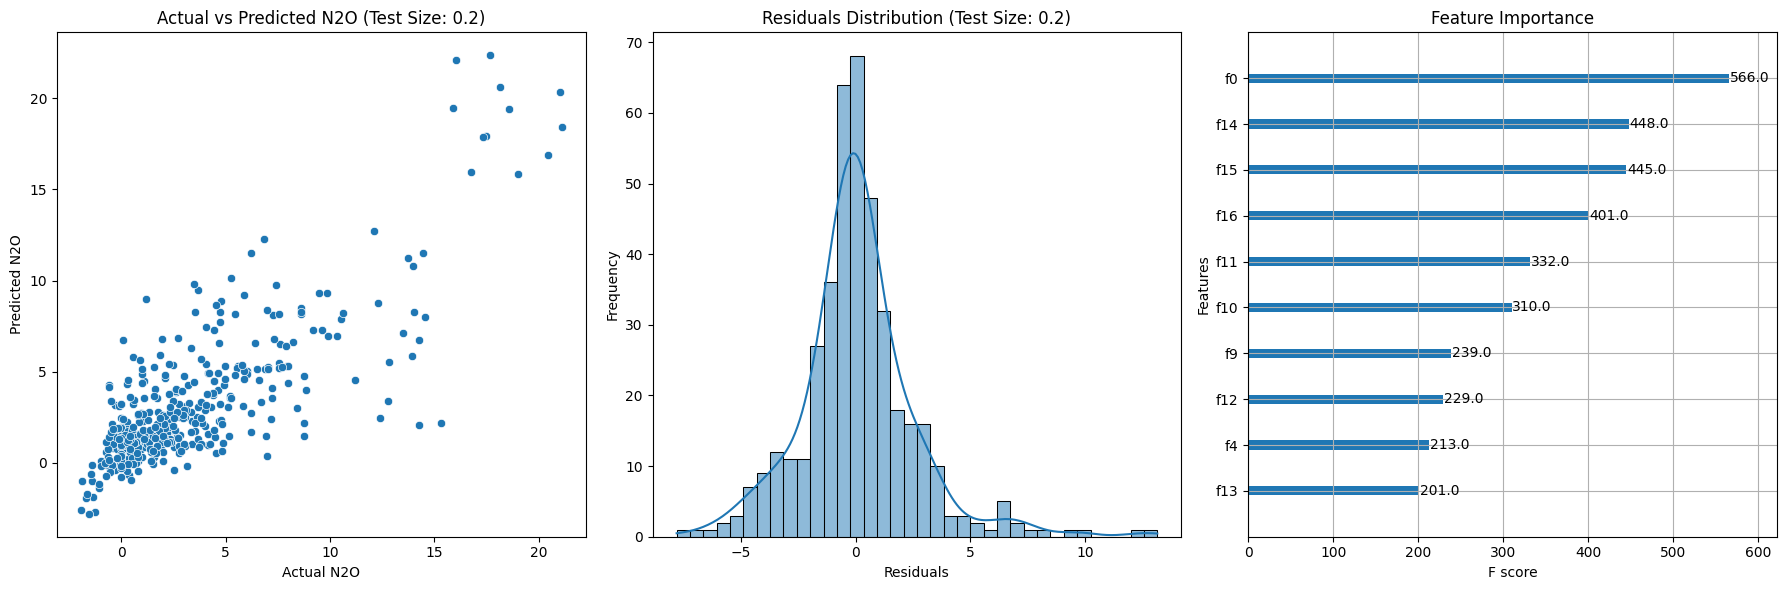

c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test Size: 0.25
Mean Squared Error: 6.8703497053095575
Root Mean Squared Error: 2.62113519401605
Mean Absolute Error: 1.8153531356167323
R-squared: 0.607466559430857


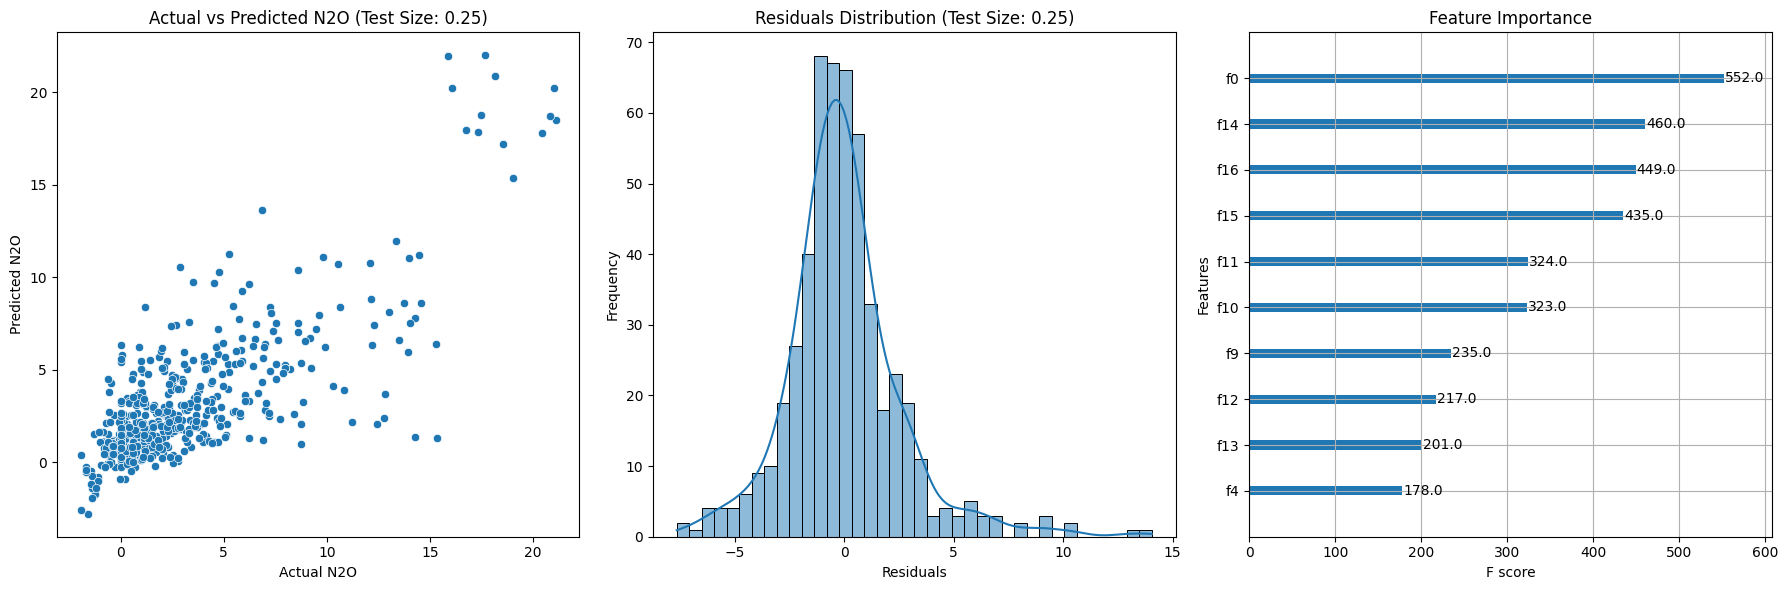

c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test Size: 0.3
Mean Squared Error: 6.444760713799277
Root Mean Squared Error: 2.5386533268249285
Mean Absolute Error: 1.7454914015029237
R-squared: 0.614602712385986


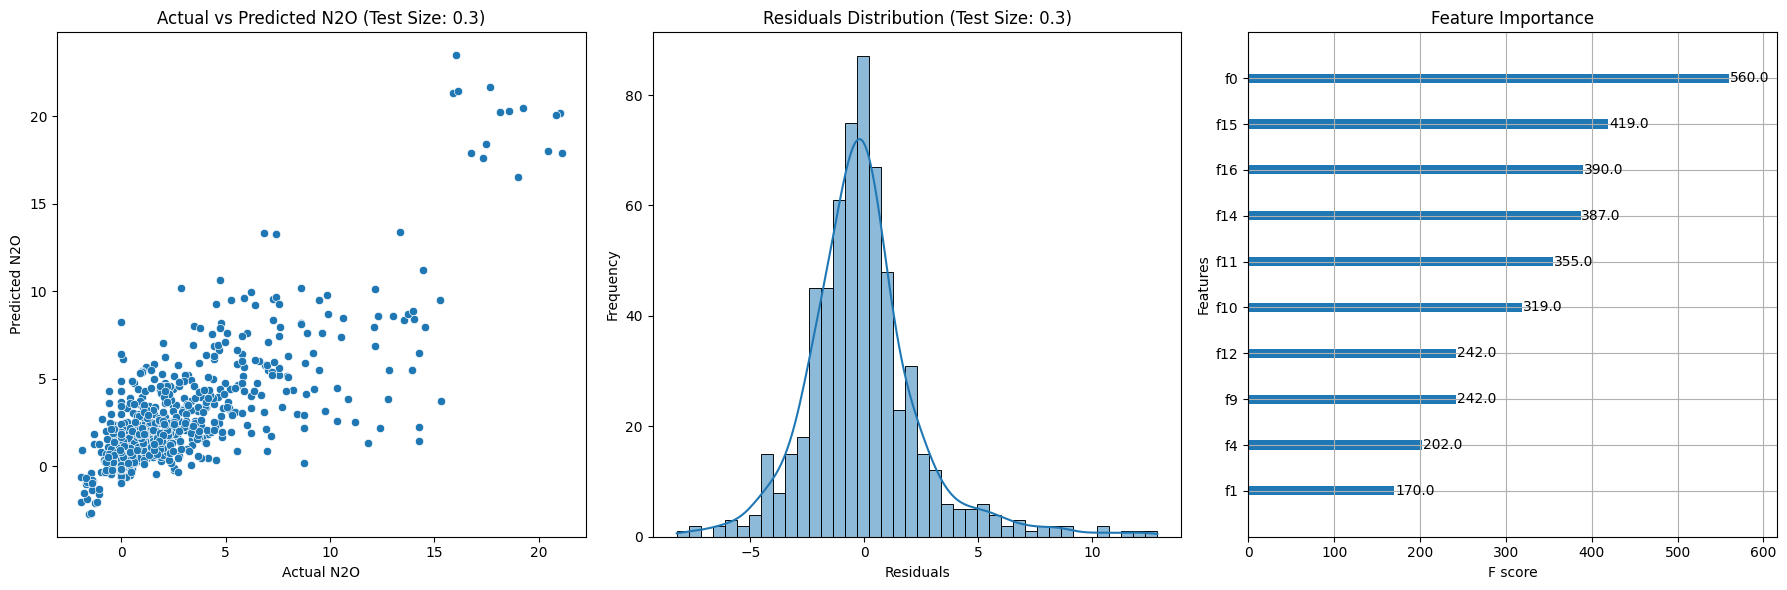

c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test Size: 0.35
Mean Squared Error: 6.976570707525591
Root Mean Squared Error: 2.6413198798187225
Mean Absolute Error: 1.8185957799326642
R-squared: 0.5690857817231034


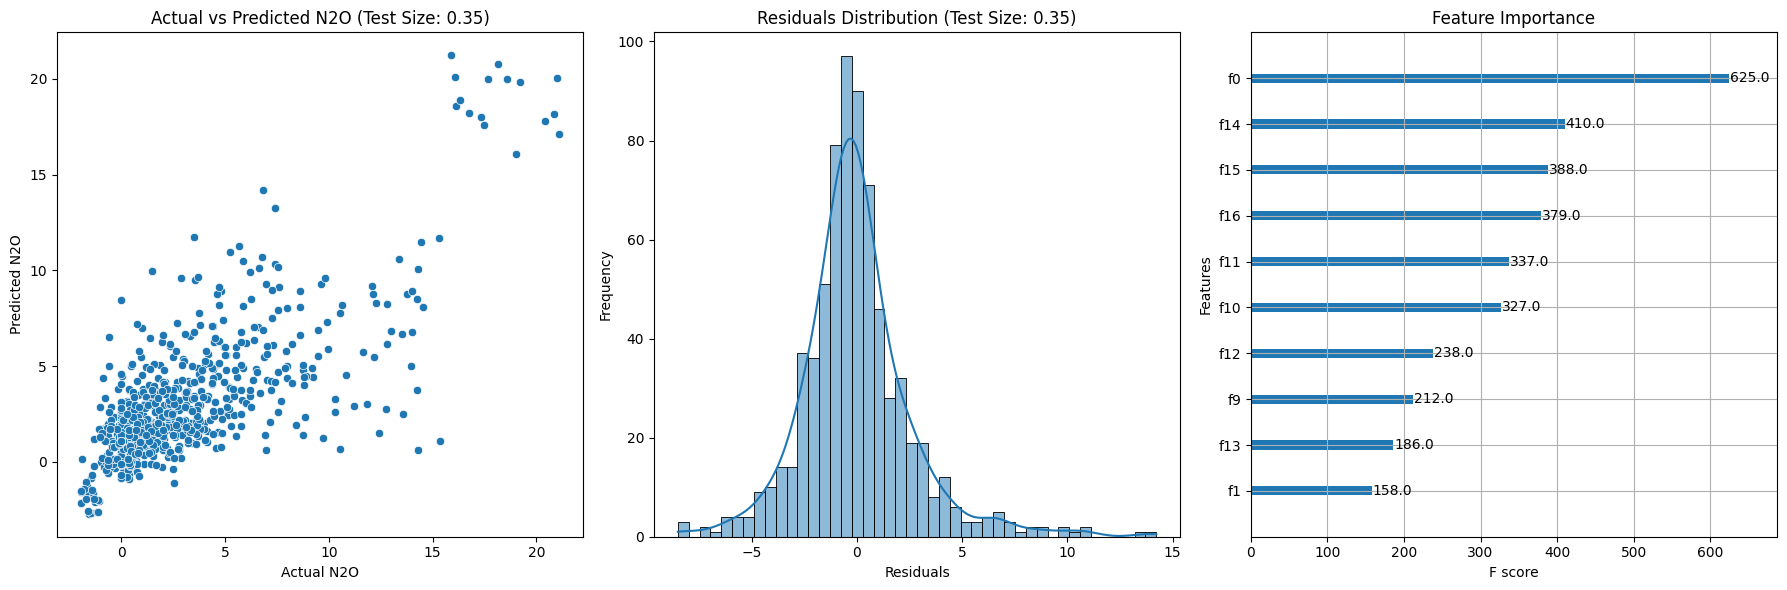

In [40]:

for test_size in test_sizes:
    model, mse, rmse, mae, r2 = train_and_evaluate(test_size)
    results[test_size] = {'model': model, 'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}
    evaluation.append({
        'test_size': test_size,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    })


In [41]:

# Convert results to a DataFrame
eval_df = pd.DataFrame(evaluation)

# Save the results to a CSV file
eval_df.to_csv('dataset/0906_0_xgboost_evaluation_datauji_nocv_results_IDO.csv', index=False)
# 
eval_df


,test_size,mse,rmse,mae,r2
0,0.20,6.446511,2.538998,1.723013,0.643607
1,0.25,6.870350,2.621135,1.815353,0.607467
2,0.30,6.444761,2.538653,1.745491,0.614603
3,0.35,6.976571,2.641320,1.818596,0.569086
4,0.20,6.446511,2.538998,1.723013,0.643607
5,0.25,6.870350,2.621135,1.815353,0.607467
6,0.30,6.444761,2.538653,1.745491,0.614603
7,0.35,6.976571,2.641320,1.818596,0.569086
8,0.20,6.446511,2.538998,1.723013,0.643607
9,0.25,6.870350,2.621135,1.815353,0.607467


In [ ]:

# Display the results
for test_size, metrics in results.items():
    print(f"Test Size: {test_size}")
    print(f"Mean Squared Error: {metrics['mse']}")
    print(f"Root Mean Squared Error: {metrics['rmse']}")
    print(f"Mean Absolute Error: {metrics['mae']}")
    print(f"R-squared: {metrics['r2']}")
    print("\n")



""" # # Loop through each test size, train and evaluate the model, and store the results
for test_size in test_sizes:
    result = train_evaluate_tuning(test_size)
    results.append(result)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('01.Dataset-Rofiqul/015_xgboost_evaluation_results.csv', index=False) """

# Display the results DataFrame
# print(results_df)